# Análise em preço de aluguéis de imóveis no Brasil
Base de dados brasileira encontrada no site do [Kaggle](https://www.kaggle.com/pyioneer/eda-v2-set-for-r-user). Possui preço de aluguéis em diferentes cidades brasileiras, além de outras informações referentes ao imóvel. No link podem ser encontrados mais informações sobre o dataset. Um fato sobre o dataset é que ele foi gerado a partir da captura de crawler, então, em alguns casos podem acontecer ter valores exorbitantes para alguns dos campos.
Esse também código está disponível no [GitHub](https://github.com/anjosma/rent_price_brazil)!

In [13]:
#install.packages("ggplot2")
#install.packages("ggcorrplot")
#install.packages("dplyr")
library("ggplot2")
library("dplyr")
library("ggcorrplot")

## Visão Geral

In [2]:
df <- read.csv("../data/houses_to_rent_v2.csv", encoding="UTF-8", header=TRUE, sep=",")
head(df)

city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955


In [3]:
colnames(df)

[1] "city"           "area"           "rooms"          "bathroom"      
 [5] "parking.spaces" "floor"          "animal"         "furniture"     
 [9] "hoa"            "rent.amount"    "property.tax"   "fire.insurance"
[13] "total"

In [4]:
df_shape <- dim(df)
uni_cities <- length(unique(df$city))
sprintf("O dataset acima possui %s linhas e %s colunas, sendo em %s cidades diferentes.", df_shape[1], df_shape[2], uni_cities)

[1] "O dataset acima possui 10692 linhas e 13 colunas, sendo em 5 cidades diferentes."

A função abaixo retorna se alguma coluna no dataframe possui campos nulos. Como o dataframe possui todos seus campos completos, não será necessário realizar nenhum tipo de preenchimento nos campos.

In [5]:
apply(df, 2, function(x) any(is.na(x)))

city           area          rooms       bathroom parking.spaces 
         FALSE          FALSE          FALSE          FALSE          FALSE 
         floor         animal      furniture            hoa    rent.amount 
         FALSE          FALSE          FALSE          FALSE          FALSE 
  property.tax fire.insurance          total 
         FALSE          FALSE          FALSE

## Análise univariada
Abaixo será realizada análise individuais de algumas variáveis disponíveis no dataset, começando pela principal, que é o preço do aluguel.

In [6]:
summary(df)

             city           area             rooms           bathroom     
 Belo Horizonte:1258   Min.   :   11.0   Min.   : 1.000   Min.   : 1.000  
 Campinas      : 853   1st Qu.:   56.0   1st Qu.: 2.000   1st Qu.: 1.000  
 Porto Alegre  :1193   Median :   90.0   Median : 2.000   Median : 2.000  
 Rio de Janeiro:1501   Mean   :  149.2   Mean   : 2.506   Mean   : 2.237  
 São Paulo     :5887   3rd Qu.:  182.0   3rd Qu.: 3.000   3rd Qu.: 3.000  
                       Max.   :46335.0   Max.   :13.000   Max.   :10.000  
                                                                          
 parking.spaces       floor            animal             furniture   
 Min.   : 0.000   -      :2461   acept    :8316   furnished    :2606  
 1st Qu.: 0.000   1      :1081   not acept:2376   not furnished:8086  
 Median : 1.000   2      : 985                                        
 Mean   : 1.609   3      : 931                                        
 3rd Qu.: 2.000   4      : 748               

Utilizando a função ```summary``` é possível ter uma rápida análise univariadas sobre os diversos campos disponíveis no dataset. Por exemplo no campo **hoa**, que é referente ao valor do condomínio, 75% dos valores de condominios são de até 1.238 reais.

Warning message:
"Removed 12 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

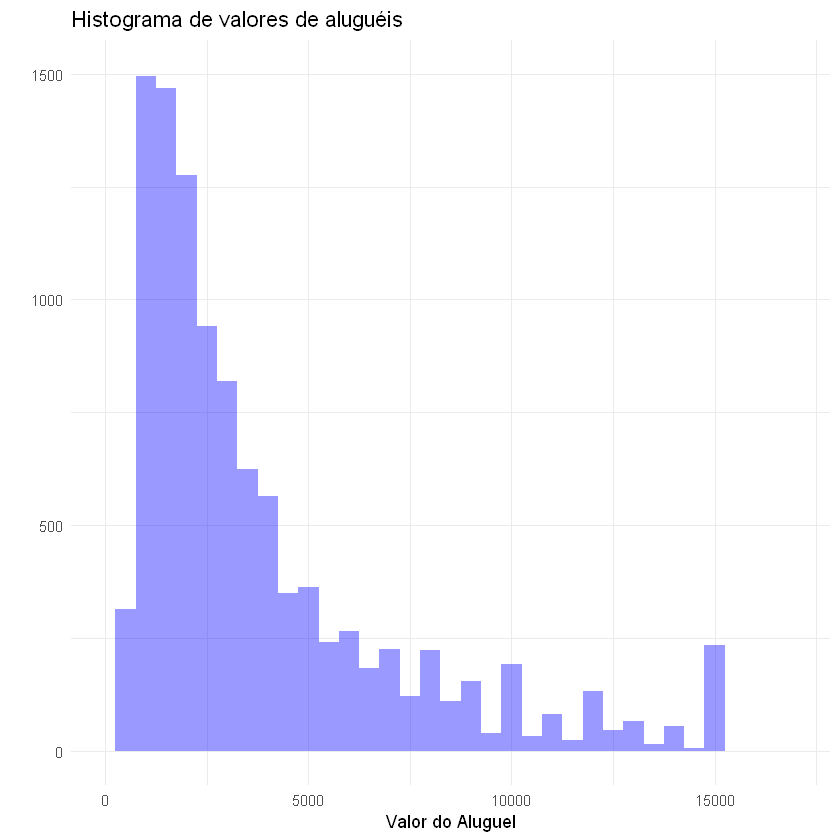

In [7]:
g_hist <- qplot(
    df$rent.amount, geom="histogram", xlab="Valor do Aluguel", xlim=c(0,17000), ylim=c(0,1500),
    binwidth=500, main = "Histograma de valores de aluguéis", fill=I("blue"), alpha=I(.4),
)+ theme_minimal()
g_hist

O maior pico no histograma está na faixa de 1.000 a 1.999 reais, o qual engloba aproximadamente 28% de todo o dataset.

In [8]:
cities_count <- df %>% count(city)
cities_count$percent <- round(cities_count$n / sum(cities_count$n), digits=2)

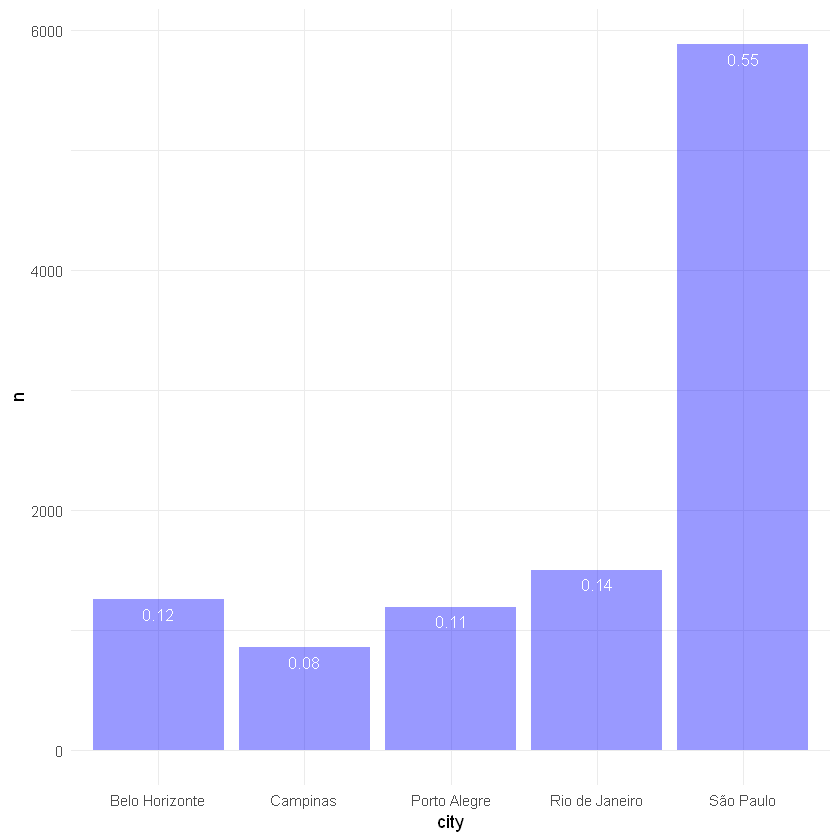

In [9]:
p <- ggplot(data=cities_count, aes(x=city, y=n)) +
  geom_bar(stat="identity", fill=I("blue"), alpha=I(.4)) + geom_text(aes(label=percent), vjust=1.6, color="white", size=3.5) + theme_minimal()
p

Como reparado no gráfico acima, temos uma base bastante desbalanceada, com São Paulo representando mais da metade (55%) dos registros presentes.

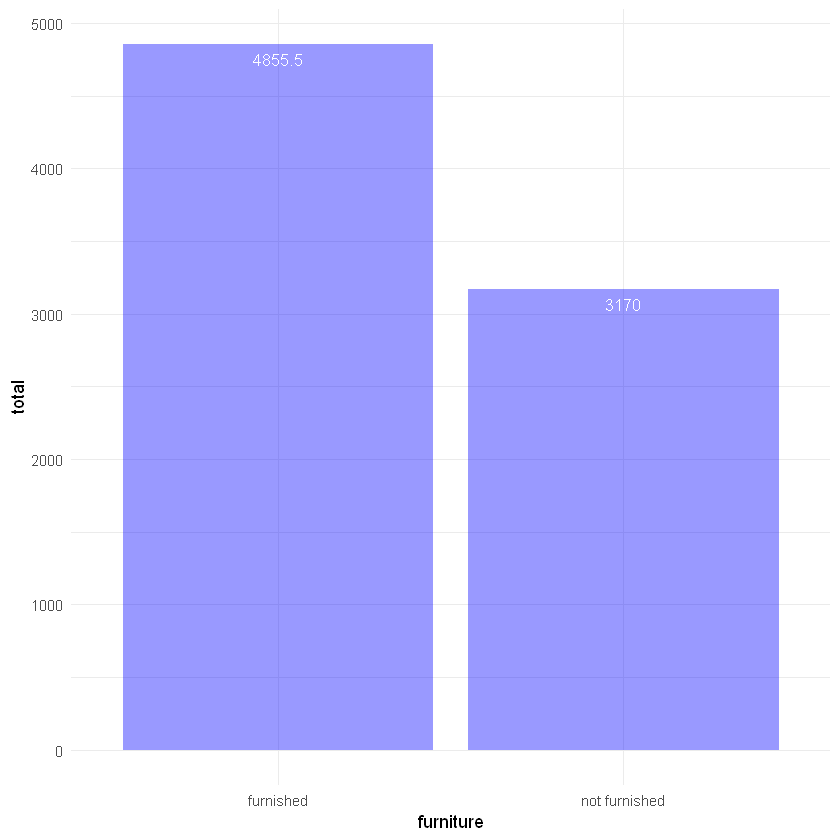

In [10]:
forn_count <- aggregate(total ~ furniture, df, median)

p <- ggplot(data=forn_count, aes(x=furniture, y=total)) +
  geom_bar(stat="identity", fill=I("blue"), alpha=I(.4)) + geom_text(aes(label=total), vjust=1.6, color="white", size=3.5) + theme_minimal()
p

Na mediana, os imóveis mobiliados custam aproximadamente 1685 reais mais caros que os que não vem (35% mais baratos). 

## Análise Bivariada

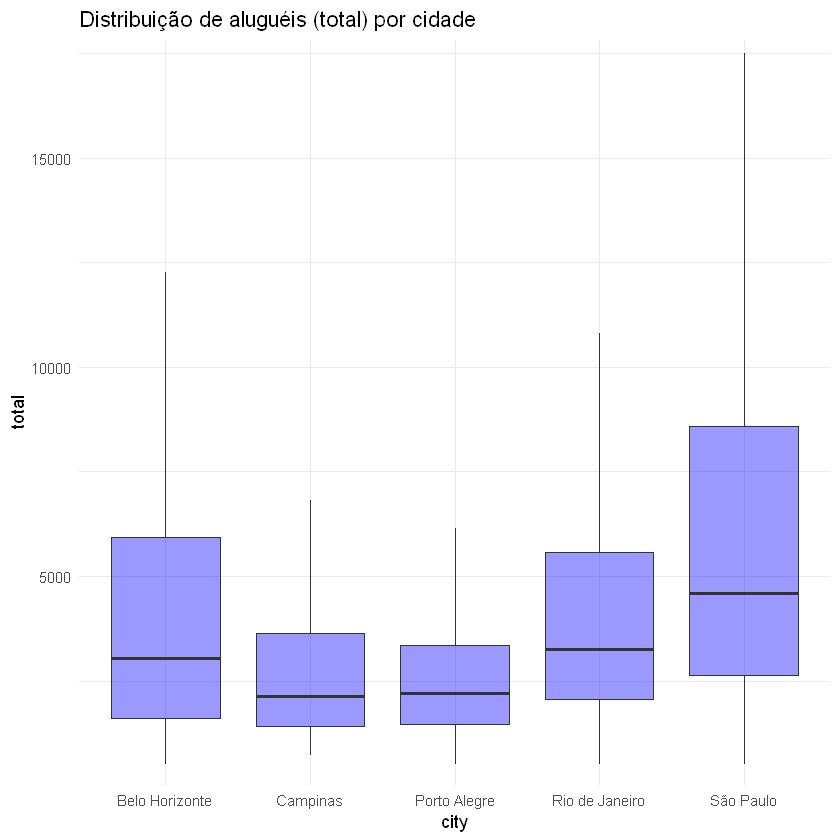

In [11]:
p <- ggplot(df, aes(x=city, y=total),) + geom_boxplot(fill=I("blue"), alpha=I(.4),
    outlier.shape=NA) + coord_cartesian(ylim = quantile(df$total, 
    c(0.01, 0.97))) + ggtitle("Distribuição de aluguéis (total) por cidade") + theme_minimal()
p

A cidade com aluguéis mais caros é São Paulo. Ao observarmos o gráfico acima podemos perceber que a mediana de São Paulo é maior que o terceiro quartil das cidades de Campinas e Porto Alegre (ambas bem parecidas). Além de que sua mediana é significativamente diferente de todos os demais múnicipios.

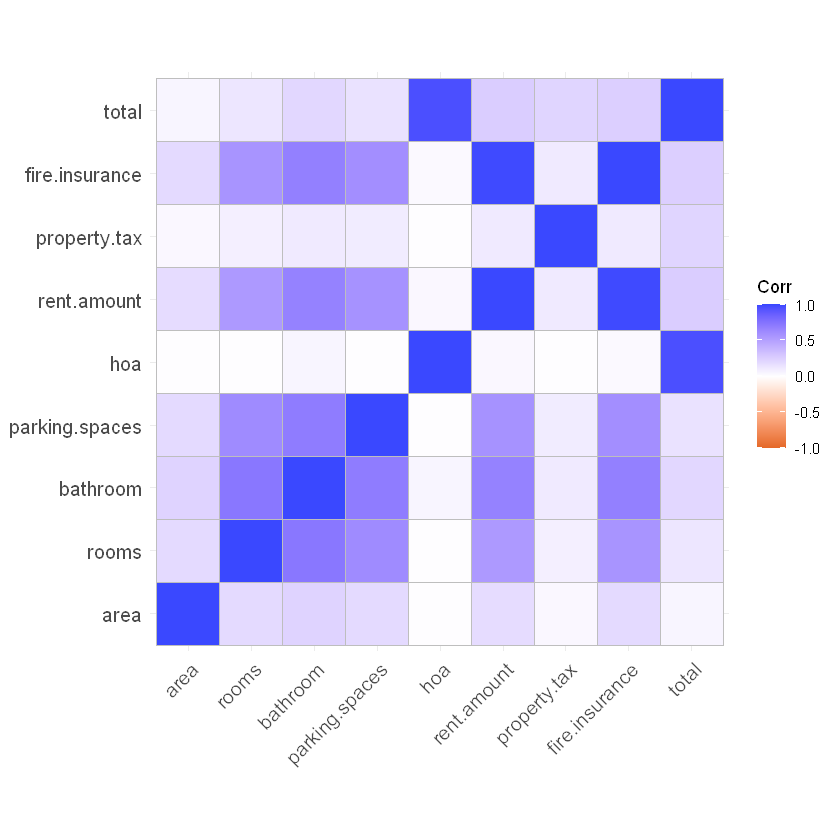

In [12]:
df_num <- select(df, area, rooms, bathroom, parking.spaces, hoa, rent.amount, property.tax, fire.insurance, total)
corr <- round(cor(df_num), 2)
ggcorrplot(corr, colors = c("#E46726", "white", "#3a48ff")
)

Com o gráfico acima podemos visualizar que há uma alta correlação entre o preço do aluguel e o seguro de incêndio. Outras correlações encontradas, porém de forma moderada são: número de banheiros e quartos; espaços recreativos e valor do aluguel.